Record the reference voice:
Recording... (Duration: 5 seconds)
Transcription: compare it
Record the new voice:
Recording... (Duration: 5 seconds)
Transcription: compare it
The same line was read. Proceeding with voice comparison...
Similarity score (lower is better): 3499.8994978685155
Similarity score: 3499.8994978685155


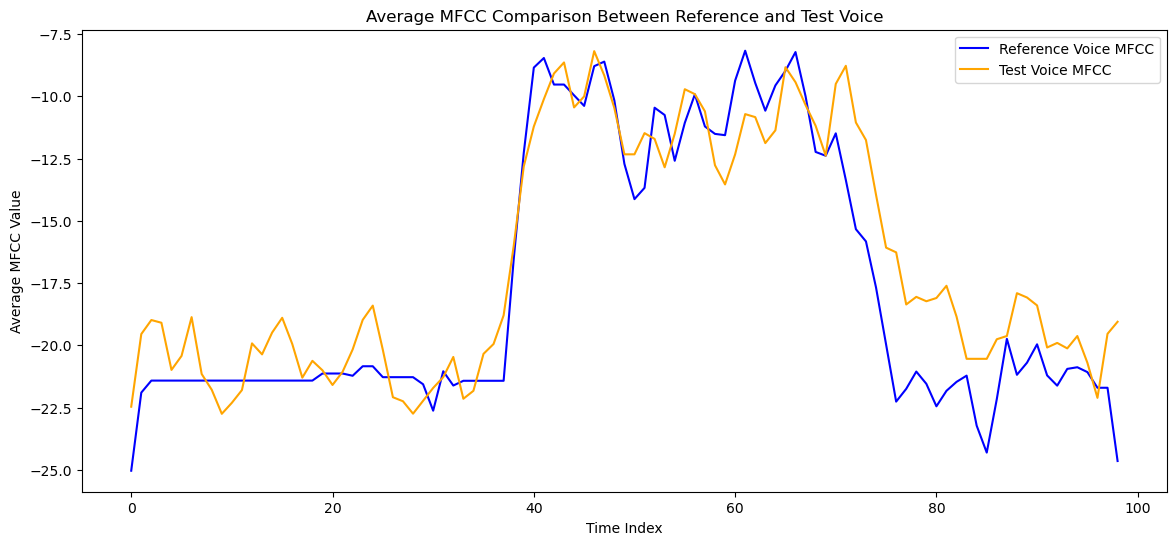

In [2]:
import speech_recognition as sr
import librosa
import numpy as np
import matplotlib.pyplot as plt
from dtw import accelerated_dtw

def record_audio(filename="output.wav", duration=5):
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print(f"Recording... (Duration: {duration} seconds)")
        audio = recognizer.listen(source, timeout=duration)
        with open(filename, "wb") as f:
            f.write(audio.get_wav_data())
    return filename

def transcribe_audio(filename):
    recognizer = sr.Recognizer()
    with sr.AudioFile(filename) as source:
        audio = recognizer.record(source)
        try:
            text = recognizer.recognize_google(audio)
            print(f"Transcription: {text}")
            return text
        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand the audio")
            return None
        except sr.RequestError:
            print("Could not request results from Google Speech Recognition service")
            return None

def extract_features(filename):
    y, sr = librosa.load(filename)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    return mfcc

def compare_voices(reference_mfcc, test_mfcc):
    distance, cost, acc_cost, path = accelerated_dtw(reference_mfcc.T, test_mfcc.T, dist='euclidean')
    print(f"Similarity score (lower is better): {distance}")
    return distance, path, acc_cost

def plot_alignment_line_chart(reference_mfcc, test_mfcc, path):
    # Average MFCC coefficients to reduce to a single line for each voice
    avg_reference_mfcc = np.mean(reference_mfcc, axis=0)
    avg_test_mfcc = np.mean(test_mfcc, axis=0)

    plt.figure(figsize=(14, 6))
    
    # Plot the average MFCCs of the reference voice
    plt.plot(avg_reference_mfcc[path[0]], label='Reference Voice MFCC', color='blue')
    
    # Plot the average MFCCs of the test voice
    plt.plot(avg_test_mfcc[path[1]], label='Test Voice MFCC', color='orange')
    
    plt.title('Average MFCC Comparison Between Reference and Test Voice')
    plt.xlabel('Time Index')
    plt.ylabel('Average MFCC Value')
    plt.legend()
    plt.show()

# Step 1: Record or load the reference voice
print("Record the reference voice:")
reference_file = record_audio("reference.wav")

# Step 2: Transcribe to ensure it's correct
reference_text = transcribe_audio(reference_file)

if reference_text:
    # Step 3: Record or load the new voice
    print("Record the new voice:")
    test_file = record_audio("test.wav")

    # Step 4: Transcribe the new voice
    test_text = transcribe_audio(test_file)

    if test_text:
        # Step 5: Compare transcriptions to ensure the same line is read
        if reference_text.lower() == test_text.lower():
            print("The same line was read. Proceeding with voice comparison...")
            
            # Step 6: Extract features
            reference_mfcc = extract_features(reference_file)
            test_mfcc = extract_features(test_file)
            
            # Step 7: Compare the two voices
            similarity_score, path, acc_cost = compare_voices(reference_mfcc, test_mfcc)
            print(f"Similarity score: {similarity_score}")

            # Step 8: Plot the line chart comparing averaged MFCCs
            plot_alignment_line_chart(reference_mfcc, test_mfcc, path)
        else:
            print("Different lines were read. Please read the same line.")
    else:
        print("Could not transcribe the new voice.")
else:
    print("Could not transcribe the reference voice.")
